In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


height:  2138
width:   3824
channel: 3


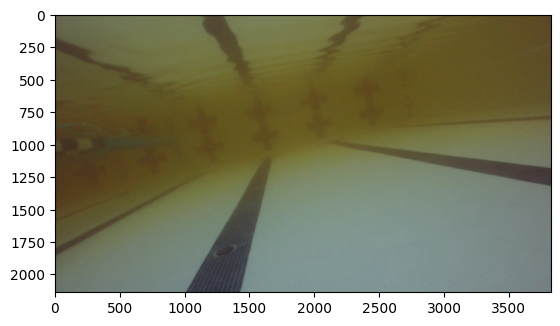

In [5]:

img = cv2.imread('lanes.png') #To read an image, use the imread function


plt.imshow(img) #To display the image, use the imshow function
h, w, c = img.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)


In [ ]:
cap = cv2.VideoCapture('AUV_Vid.mkv') #read a video
ret, frame = cap.read() #To read the video frame by frame, use the read function
print (len(frame))

###Drawing on Images
# cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5) #To draw a line on an image, use the line function

# cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5) #draw a rectangle on an image
# cv2.circle(img, (50, 50), 50, (0, 0, 255), 5) #draw a circle on an image

# pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
# pts = pts.reshape((-1, 1, 2))
# cv2.polylines(img, [pts], True, (0, 255, 255), 5) #draw a polygon on an image

# cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) #draw text on an image



In [3]:
def drawLines(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 90, 100, apertureSize=3) 
    lines = cv2.HoughLinesP(
                    edges, #described above
                    1, #1 pixel resolution parameter
                    np.pi/180, # 1 degree resolution parameter
                    10, #min number of intersections/votes
                    minLineLength=10,
                    maxLineGap=60,
            ) # detect lines
    try:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            slope = (y2-y1)/(x2-x1)
            print(str(slope))
    except TypeError:
        pass
    
    return img

In [ ]:

video = cv2.VideoCapture('AUV_Vid.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS)) #gets frames per second
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH)) #gets widtch of video
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)) #gets height of video

output_file = 'output_video.avi' #name of video outputted
fourcc = cv2.VideoWriter_fourcc(*'XVID') #????????
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret, frame = video.read()
count = 0
frequency = 1

while ret:
    if count % frequency == 0:
        processed_frame = drawLines(frame)
        output_video.write(processed_frame)

    count += 1
    ret, frame = video.read()

video.release()
output_video.release()

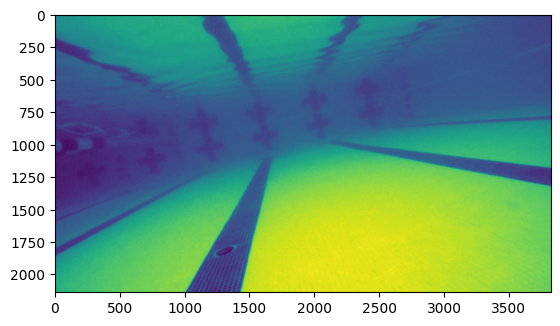

In [4]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

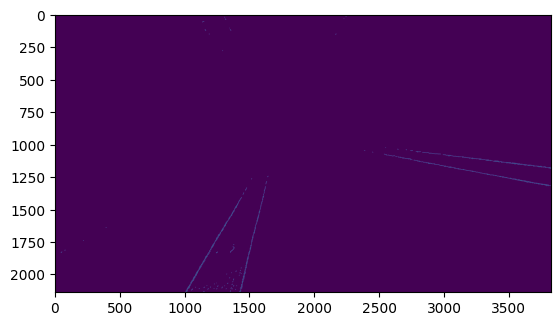

In [5]:

edges = cv2.Canny(gray, 30, 43, apertureSize=3) # detect edges
plt.imshow(edges)

0.19474313022700118
0.12285012285012285
-1.6675
-4.016759776536313


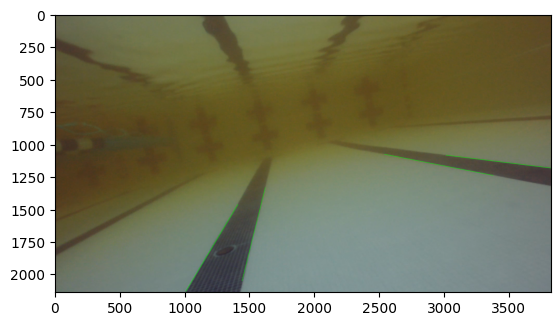

In [6]:

lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33) # detect lines
#lines = cv2.HoughLinesP(edges, 3, np.pi/180, 1, minLineLength=300, maxLineGap=10) # detect lines


for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    print ((y2-y1)/(x2-x1))
    #print (x1)

plt.imshow(img)


In [ ]:
len(lines)

In [ ]:
#---------------------------------------------  APRIL TAGS  ------------------------------------------------------
# from dt_apriltags import Detector
# img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
# at_detector = Detector(families='tag36h11',
#                        nthreads=1,
#                        quad_decimate=1.0,
#                        quad_sigma=0.0,
#                        refine_edges=1,
#                        decode_sharpening=0.25,
#                        debug=0)

# tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

# color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# for tag in tags:
#     for idx in range(len(tag.corners)):
#         cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

#     cv2.putText(color_img, str(tag.tag_id),
#                 org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
#                 fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#                 fontScale=0.8,
#                 color=(0, 0, 255))


# plt.imshow(color_img)






In [ ]:
# import cv2 
# from matplotlib import pyplot as plt
# import numpy as np

# vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
# ret, frame = vcap.read()

# plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
